# Самостоятельный проект: Сборный проект —2

In [1]:
!pip install shap
!pip install phik
!pip install --upgrade scikit-learn

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display 
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.metrics import (mean_squared_error, accuracy_score, 
                             r2_score, confusion_matrix, recall_score, 
                             precision_score, make_scorer, f1_score,
                             roc_auc_score, classification_report)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, LabelEncoder


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification

import shap
import phik
from phik import resources, report

import warnings
warnings.filterwarnings("ignore")

from sklearn.dummy import DummyRegressor

plt.rcParams["figure.figsize"] = (15,10)

# Задача 1

## Шаг 1. Загрузка данных

### Прочитаем входные данные

In [3]:
df_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
df_test = pd.read_csv('/datasets/test_features.csv')
df_y = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
display(df_train)
display(df_test)
display(df_y)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
...,...,...
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26


In [5]:
display(df_train.info())
display(df_test.info())
display(df_y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

типы данных сходяться, ошибок не обнаружил

## Шаг 2. Предобработка данных

### Пропуски

In [6]:
display('Пропуски df_train:', df_train.isna().sum())
display('Пропуски df_test:',df_test.isna().sum())
display('Пропуски df_y:', df_y.isna().sum())

'Пропуски df_train:'

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

'Пропуски df_test:'

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

'Пропуски df_y:'

id                       0
job_satisfaction_rate    0
dtype: int64

Присутствуют пропуски в dept и level, заполним их в конвеере

### Дубликаты

проверим дубликаты, всякое может быть...

In [7]:
display('Дубликаты df_train:', df_train.duplicated().sum())
display('Дубликаты df_test:',df_test.duplicated().sum())
display('Дубликаты df_y:',df_y.duplicated().sum())

'Дубликаты df_train:'

0

'Дубликаты df_test:'

0

'Дубликаты df_y:'

0

дубликатов нет, отлично

### Уникальные значения

In [8]:
df_train.nunique()

id                       4000
dept                        5
level                       3
workload                    3
employment_years           10
last_year_promo             2
last_year_violations        2
supervisor_evaluation       5
salary                     68
job_satisfaction_rate      98
dtype: int64

In [9]:
for col in df_train:
    print(df_train[col].unique())

[155278 653870 184592 ... 533318 706868 338347]
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']
[ 2  1  4  7  9  6  3 10  8  5]
['no' 'yes']
['no' 'yes']
[1 5 2 3 4]
[24000 38400 12000 18000 22800 30000 56400 52800 13200 54000 19200 40800
 34800 27600 26400 33600 50400 15600 14400 25200 72000 31200 32400 48000
 43200 46800 58800 84000 44400 39600 37200 21600 28800 62400 60000 42000
 49200 55200 57600 68400 45600 51600 64800 80400 20400 61200 76800 69600
 16800 36000 63600 81600 66000 74400 67200 70800 73200 75600 79200 94800
 78000 88800 92400 85200 91200 98400 96000 97200]
[0.58 0.76 0.11 0.37 0.2  0.78 0.56 0.44 0.14 0.47 0.74 0.42 0.32 0.57
 0.16 0.69 0.33 0.64 0.39 0.8  0.79 0.17 0.65 0.18 0.19 0.49 0.63 0.22
 0.23 0.5  0.35 0.3  0.77 0.88 0.59 0.21 0.36 0.85 0.7  0.48 0.6  0.1
 0.27 0.71 0.86 0.54 0.73 0.46 0.31 0.72 0.51 0.61 0.81 0.99 0.15 0.91
 0.68 0.4  0.89 0.67 0.75 0.98 0.26 0.45 0.92 0.82 0.66 0.55 0.38 0.53

In [10]:
df_test.nunique()

id                       2000
dept                        6
level                       3
workload                    4
employment_years           10
last_year_promo             2
last_year_violations        2
supervisor_evaluation       5
salary                     66
dtype: int64

In [11]:
for col in df_test:
    print(df_test[col].unique())

[485046 686555 467458 ... 305653 160233 771859]
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]
[28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400
 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200
 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400
 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 60000
 66000 67200 70800 76800 79200 69600 94800 82800 80400 87600 86400 96000
 78000 75600 73200 84000 88800 92400]


In [12]:
df_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

в df_test['dept'] помимо пропущенных значений есть еще и не верно заполненые

In [13]:
df_test['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [14]:
df_y.nunique()

id                       2000
job_satisfaction_rate      98
dtype: int64

присутствуют пропуски " " в колонках dept и workload, будут обработаны в конвеере автоматически

### Выбросы

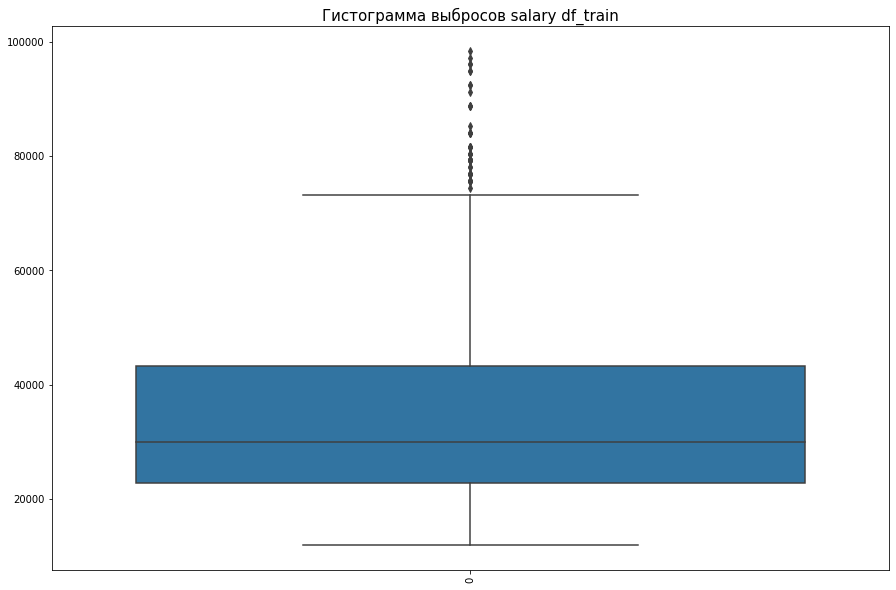

In [15]:
df_train_salary = df_train['salary'].copy()
ax = sns.boxplot(data=df_train_salary)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов salary df_train', size=15)
plt.show()

средний уровень зарплат от 25 до 41тр, присутствуют зарплаты выше 75тр, скорей всего на высоких должностях

In [16]:
df_train.query('salary > 60000')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
32,176144,hr,sinior,high,3,no,no,1,72000,0.22
45,538347,technology,sinior,high,3,no,no,1,84000,0.21
59,307447,marketing,middle,high,5,no,no,3,62400,0.50
108,826954,technology,middle,high,5,yes,no,4,68400,0.98
110,906885,technology,sinior,medium,10,no,no,4,62400,0.68
...,...,...,...,...,...,...,...,...,...,...
3942,215496,technology,sinior,medium,10,no,yes,4,70800,0.63
3955,901323,technology,sinior,medium,8,yes,no,4,63600,1.00
3956,276978,sales,sinior,high,5,no,no,4,64800,0.50
3964,351063,hr,sinior,high,6,no,yes,2,64800,0.16


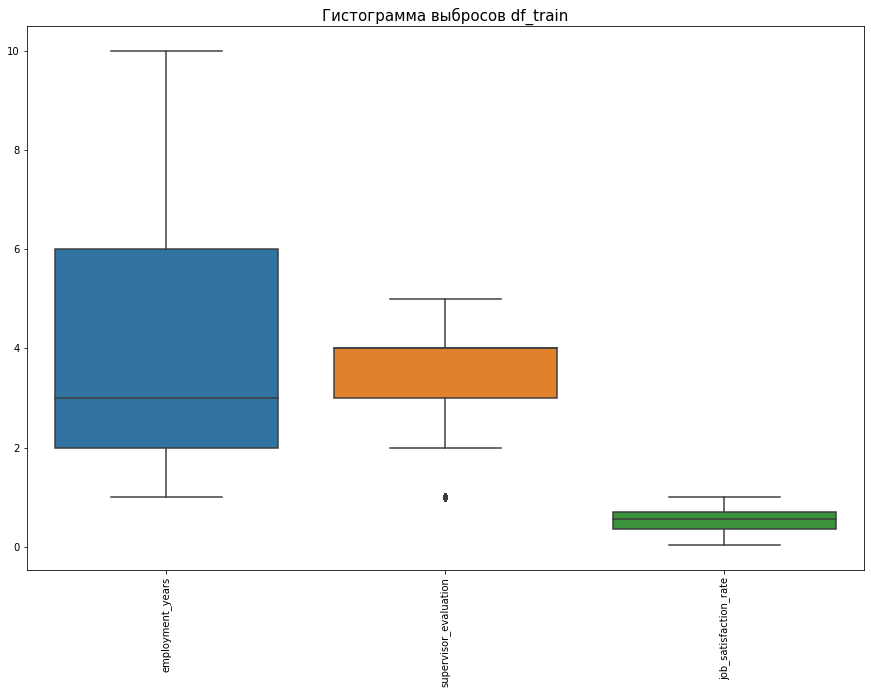

In [17]:
df_train_without_id_salary = df_train.copy()
df_train_without_id_salary = df_train_without_id_salary.drop(['id', 'salary'], axis=1)
ax = sns.boxplot(data=df_train_without_id_salary)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов df_train', size=15)
plt.show()

выбросов нет, проверим другие таблицы

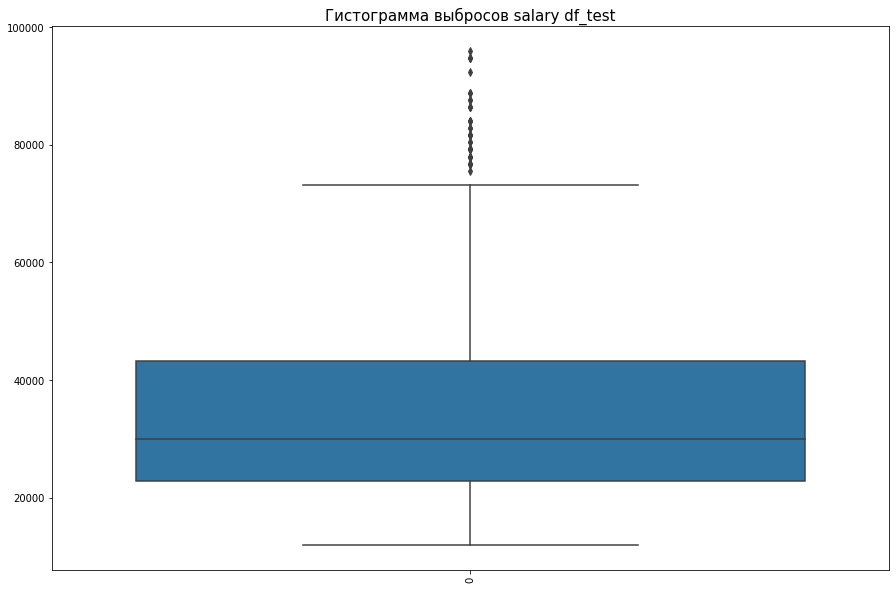

In [18]:
df_test_without_id = df_test['salary'].copy()
ax = sns.boxplot(data=df_test_without_id)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов salary df_test', size=15)
plt.show()

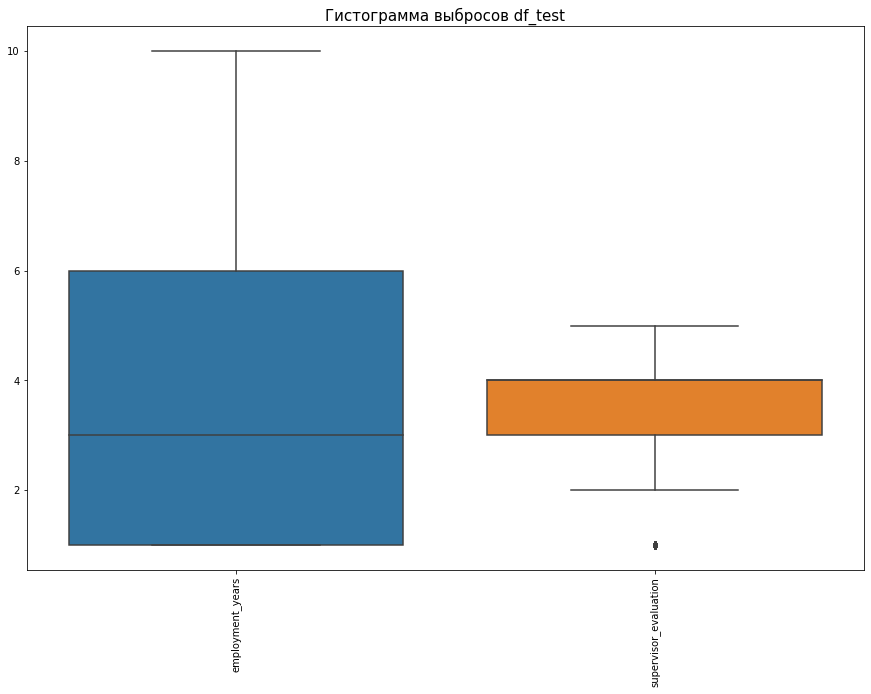

In [19]:
df_test_without_id_salary = df_test.copy()
df_test_without_id_salary = df_test_without_id_salary.drop(['id', 'salary'], axis=1)
ax = sns.boxplot(data=df_test_without_id_salary)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов df_test', size=15)
plt.show()

данные идентичные тренировочной выборки

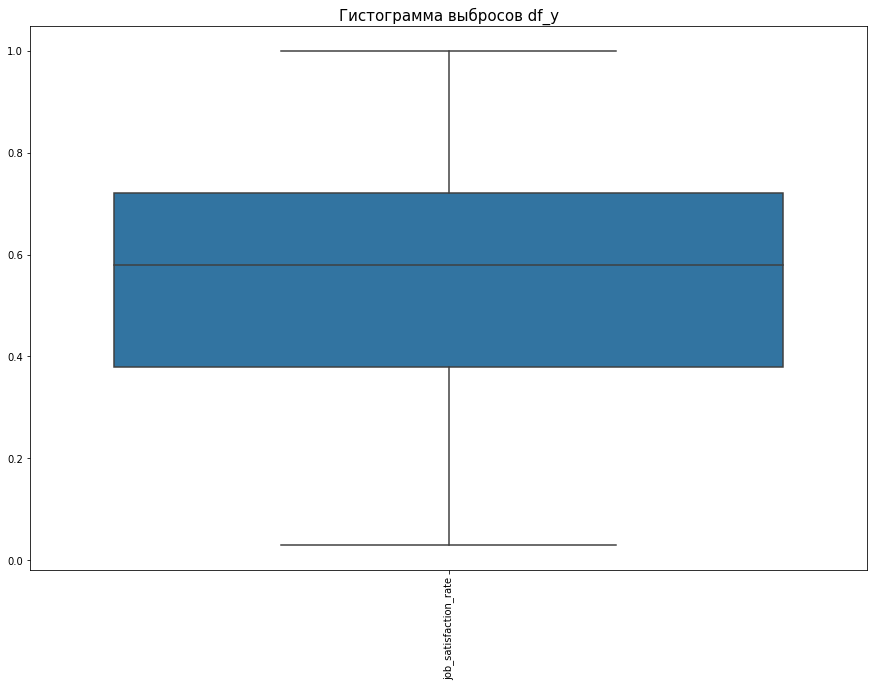

In [20]:
y_df_without_id = df_y.copy()
y_df_without_id = y_df_without_id.drop(['id'], axis=1)
ax = sns.boxplot(data=y_df_without_id)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Гистограмма выбросов df_y', size=15)
plt.show()

Проблемных данных не обнаружил, перейдем к исследовательскому анализу данных

после проверки данных, были в таблице df_test были обнаружены не верно заполненые значения в колонках dept и workload - заполнили их значением Nan.

Выбросы/анамалии в данных отсутсвуют, результаты df_train и df_test похожи

## Шаг 3. Исследовательский анализ данных

### Гистограммы

#### Гистограммы df_train

In [21]:
df_train_without_id = df_train.copy()
df_train_without_id = df_train_without_id.drop(['id'], axis=1)

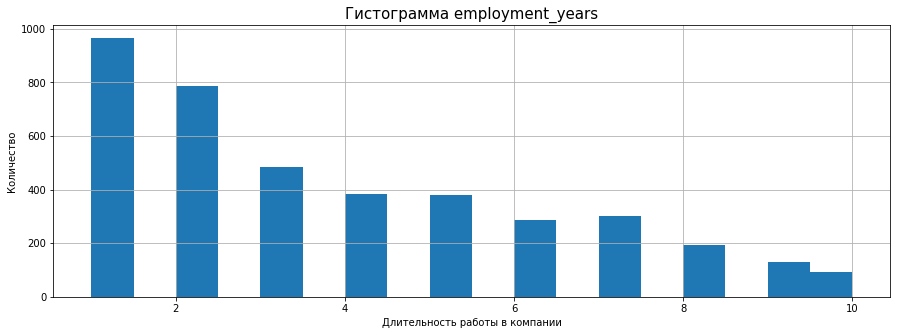

In [22]:
df_train_without_id['employment_years'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма employment_years', size=15)
plt.xlabel('Длительность работы в компании')
plt.ylabel('Количество')
plt.show()

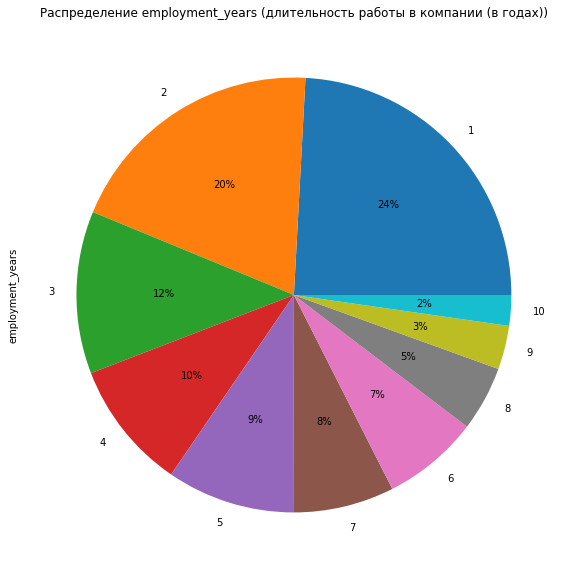

In [23]:
employment_years = df_train_without_id.groupby('employment_years').employment_years.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение employment_years (длительность работы в компании (в годах))', autopct = '%1.0f%%');

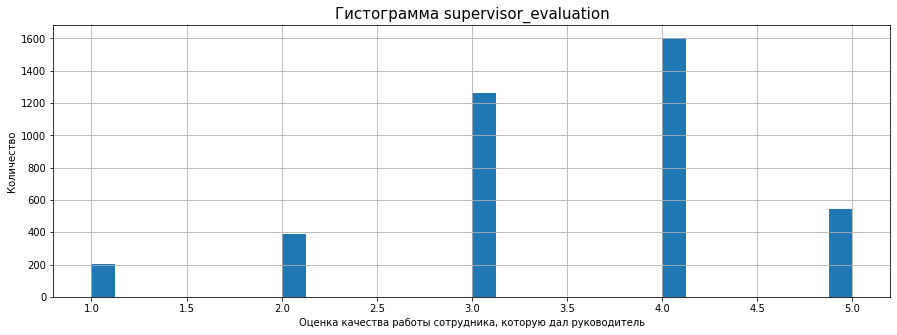

In [24]:
df_train_without_id['supervisor_evaluation'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма supervisor_evaluation', size=15)
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель')
plt.ylabel('Количество')
plt.show()

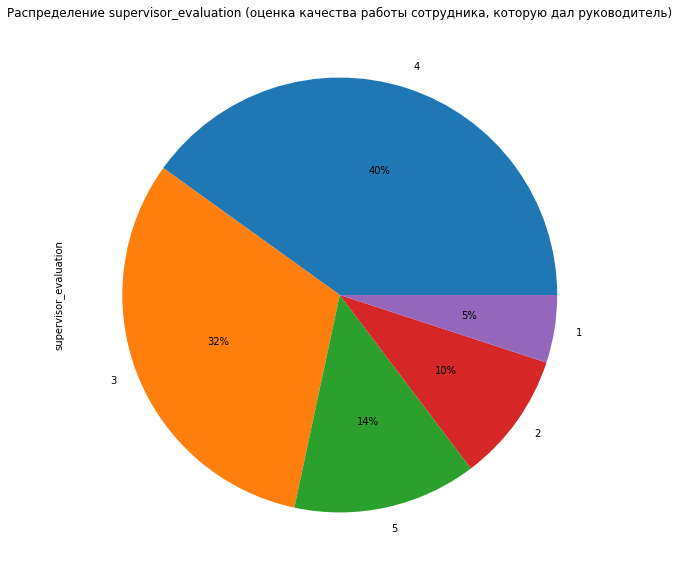

In [25]:
employment_years = df_train_without_id.groupby('supervisor_evaluation').supervisor_evaluation.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение supervisor_evaluation (оценка качества работы сотрудника, которую дал руководитель)', autopct = '%1.0f%%');

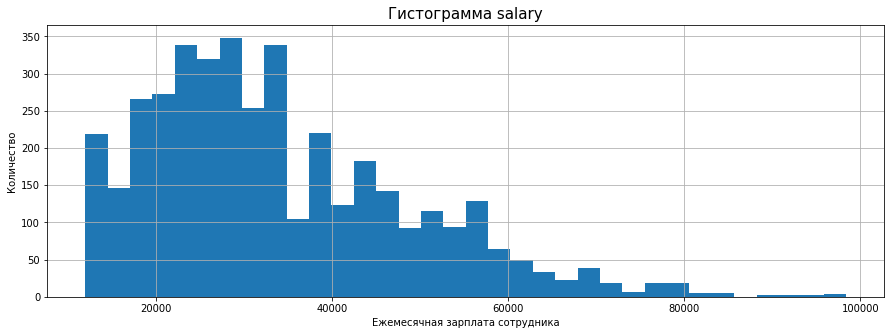

In [26]:
df_train_without_id['salary'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма salary', size=15)
plt.xlabel('Ежемесячная зарплата сотрудника')
plt.ylabel('Количество')
plt.show()

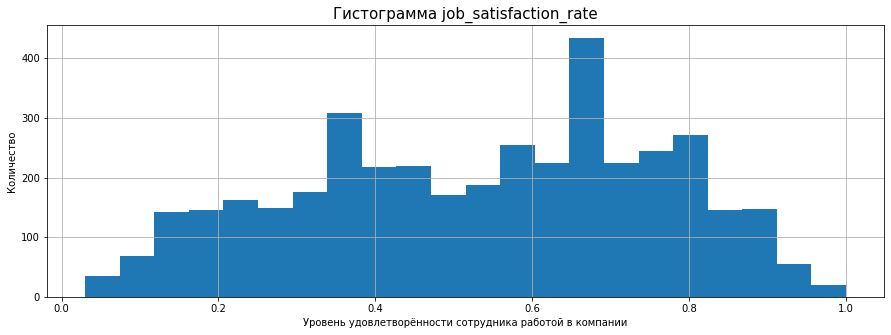

In [27]:
df_train_without_id['job_satisfaction_rate'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма job_satisfaction_rate', size=15)
plt.xlabel('Уровень удовлетворённости сотрудника работой в компании')
plt.ylabel('Количество')
plt.show()

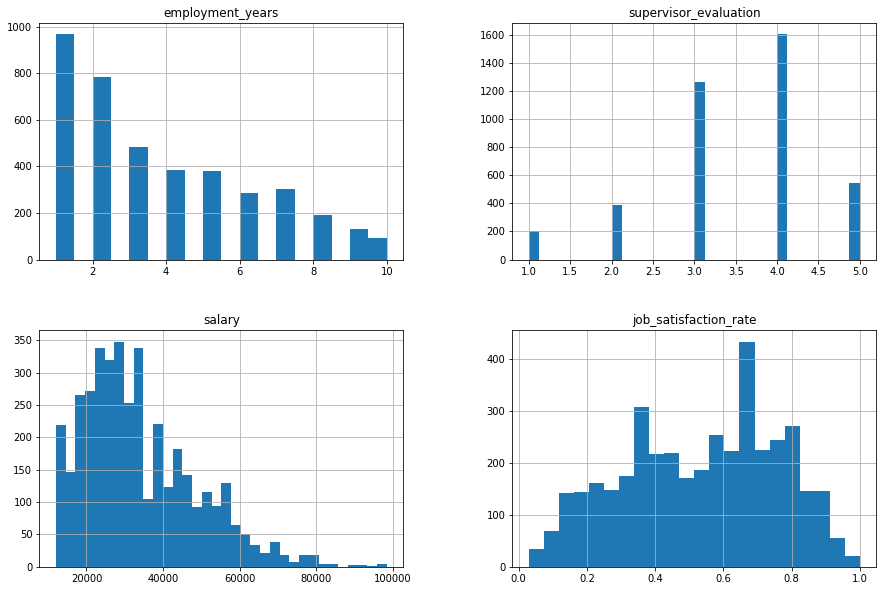

In [28]:
df_train_without_id.hist(bins='auto'); # так было изначально, оставил чтобы было понятно, что изменили

In [29]:
dept = df_train_without_id.groupby('dept').dept.count().sort_values(ascending=False)
level = df_train_without_id.groupby('level').dept.count().sort_values(ascending=False) 
workload = df_train_without_id.groupby('workload').workload.count().sort_values(ascending=False)
last_year_promo = df_train_without_id.groupby('last_year_promo').last_year_promo.count().sort_values(ascending=False)
last_year_violations = df_train_without_id.groupby('last_year_violations').last_year_violations.count().sort_values(ascending=False)

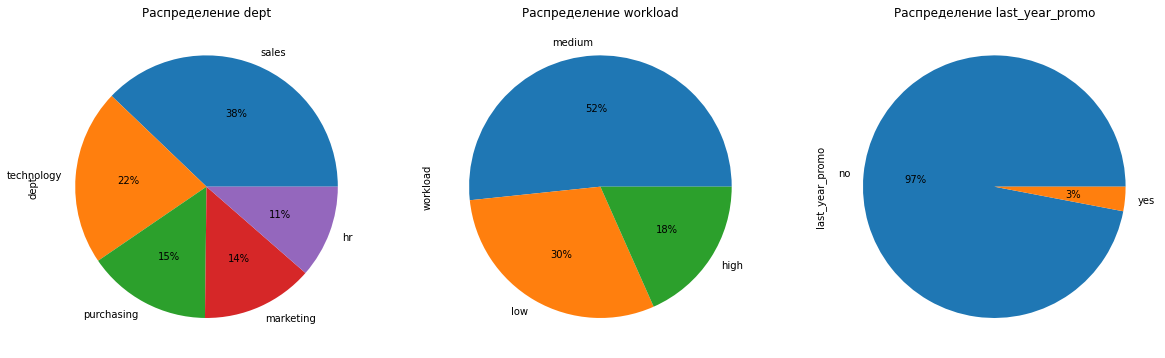

In [30]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
dept.plot(kind = 'pie', title = 'Распределение dept', autopct = '%1.0f%%')
plt.subplot(1, 3, 2)
workload.plot(kind = 'pie', title = 'Распределение workload', autopct = '%1.0f%%')
plt.subplot(1, 3, 3)
last_year_promo.plot(kind = 'pie', title = 'Распределение last_year_promo', autopct = '%1.0f%%');

#plt.suptitle('Распределение df_train', fontsize=14, fontweight='bold'); # графики почему-то улетают вниз

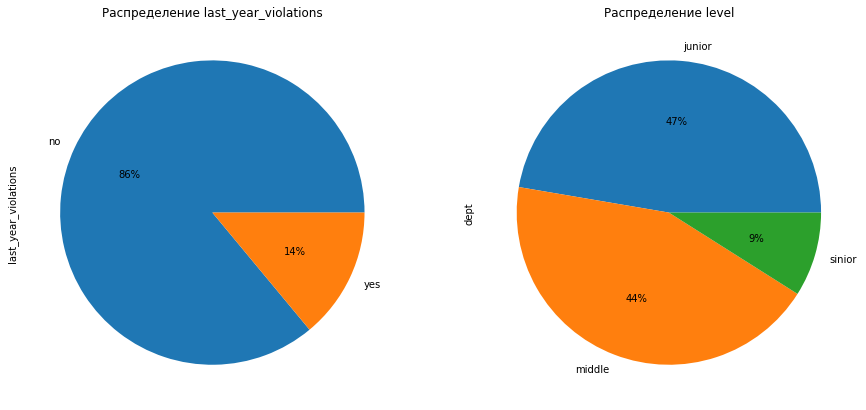

In [31]:
plt.subplot(1, 2, 1)
last_year_violations.plot(kind = 'pie', title = 'Распределение last_year_violations', autopct = '%1.0f%%');
plt.subplot(1, 2, 2)
level.plot(kind = 'pie', title = 'Распределение level', autopct = '%1.0f%%');

Выводы:

* Длительность работы в компании: большая часть работает большинство работает 1-2 года
* Средняя оценка качества сотрудников 3-4 
* Средняя зарплата от 20 до 40тр 
* Уровень удовлетворённости в среднем от 0.2 до 0.8 
* Больше всего работают в отделе sales и еусртщдщпн 38% и 22%, соответственно
* Загруженность 52% medium
* Повышение не имели 97% сотрудников 
* Нарушение имели 86% сотрудников за последний год
* Больше всего работает джунов 47% и миддлов 44%

#### Гистограммы df_test

In [32]:
df_test_without_id = df_test.copy()
df_test_without_id = df_test_without_id.drop(['id'], axis=1)

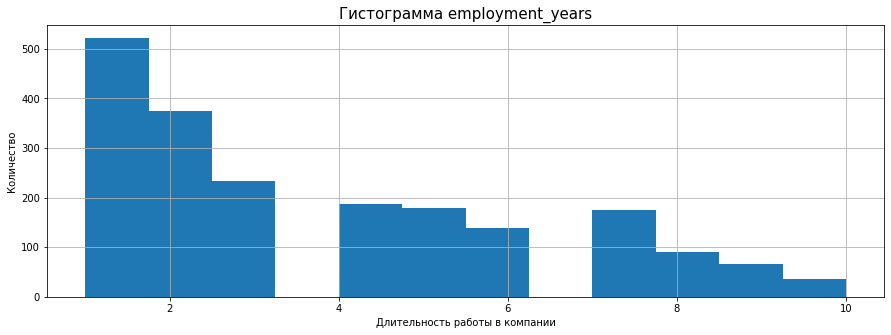

In [33]:
df_test_without_id['employment_years'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма employment_years', size=15)
plt.xlabel('Длительность работы в компании')
plt.ylabel('Количество')
plt.show()

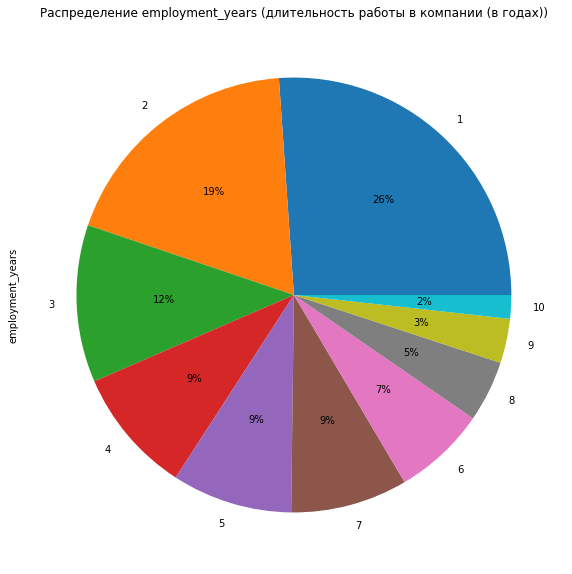

In [34]:
employment_years = df_test_without_id.groupby('employment_years').employment_years.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение employment_years (длительность работы в компании (в годах))', autopct = '%1.0f%%');

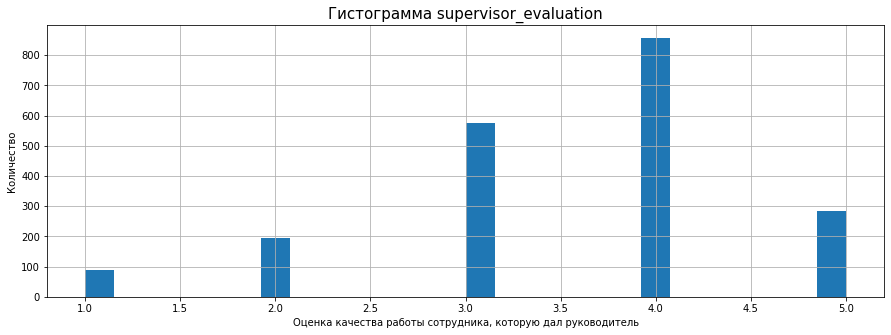

In [35]:
df_test_without_id['supervisor_evaluation'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма supervisor_evaluation', size=15)
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель')
plt.ylabel('Количество')
plt.show()

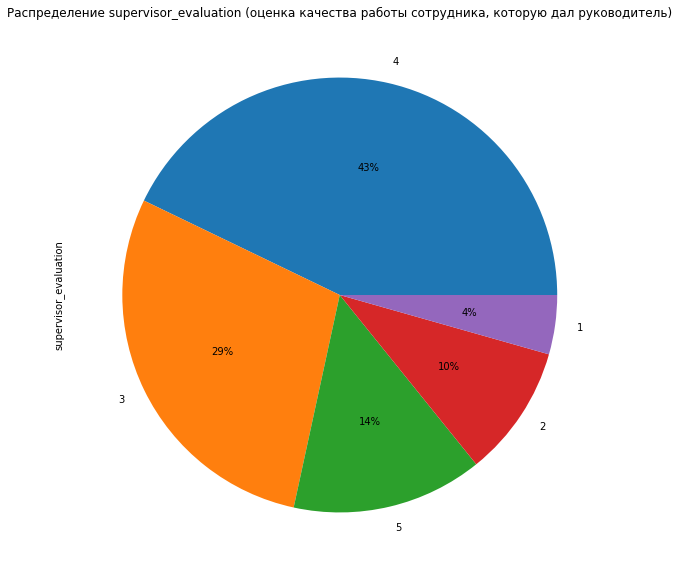

In [36]:
employment_years = df_test_without_id.groupby('supervisor_evaluation').supervisor_evaluation.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение supervisor_evaluation (оценка качества работы сотрудника, которую дал руководитель)', autopct = '%1.0f%%');

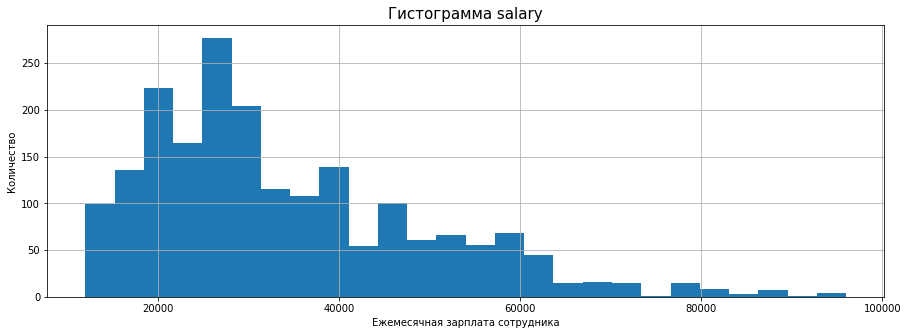

In [37]:
df_test_without_id['salary'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма salary', size=15)
plt.xlabel('Ежемесячная зарплата сотрудника')
plt.ylabel('Количество')
plt.show()

In [38]:
dept = df_test_without_id.groupby('dept').dept.count().sort_values(ascending=False)
workload = df_test_without_id.groupby('workload').workload.count().sort_values(ascending=False)
level = df_test_without_id.groupby('level').workload.count().sort_values(ascending=False)
last_year_promo = df_test_without_id.groupby('last_year_promo').last_year_promo.count().sort_values(ascending=False)
last_year_violations = df_test_without_id.groupby('last_year_violations').last_year_violations.count().sort_values(ascending=False)

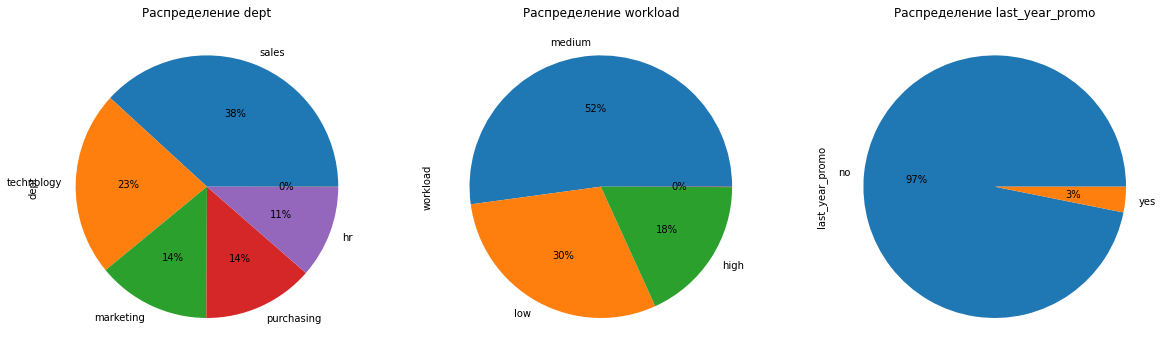

In [39]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
dept.plot(kind = 'pie', title = 'Распределение dept', autopct = '%1.0f%%')
plt.subplot(1, 3, 2)
workload.plot(kind = 'pie', title = 'Распределение workload', autopct = '%1.0f%%')
plt.subplot(1, 3, 3)
last_year_promo.plot(kind = 'pie', title = 'Распределение last_year_promo', autopct = '%1.0f%%');

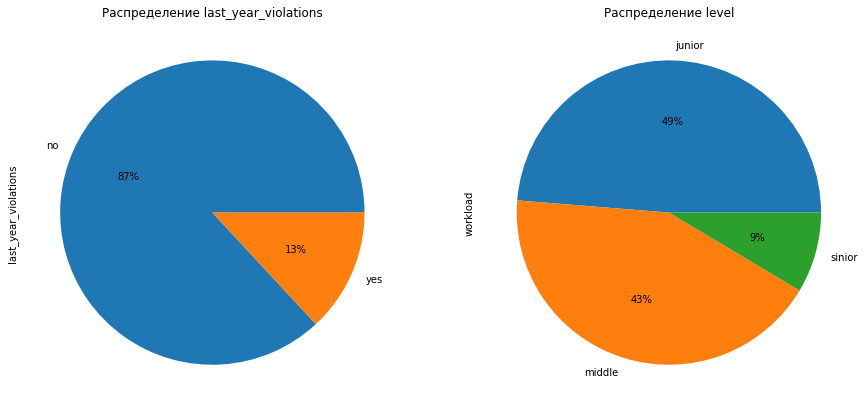

In [40]:
plt.subplot(1, 2, 1)
last_year_violations.plot(kind = 'pie', title = 'Распределение last_year_violations', autopct = '%1.0f%%')
plt.subplot(1, 2, 2)
level.plot(kind = 'pie', title = 'Распределение level', autopct = '%1.0f%%');

Выводы: данные, практически идентичны с df_train

#### Гистограммы df_y

In [41]:
df_y_without_id = df_y.copy()
df_y_without_id = df_y_without_id.drop(['id'], axis=1)

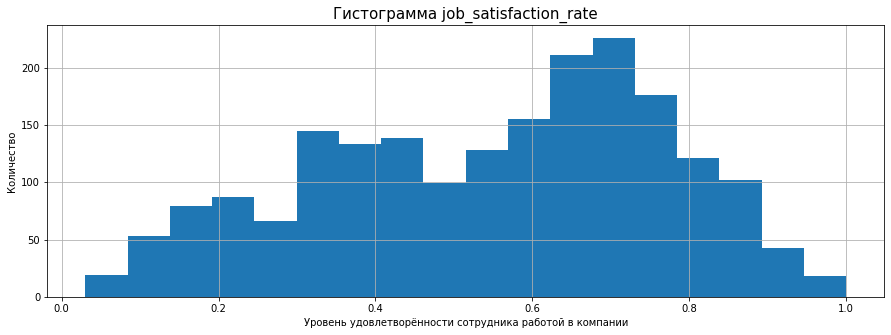

In [42]:
df_y_without_id['job_satisfaction_rate'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма job_satisfaction_rate', size=15)
plt.xlabel('Уровень удовлетворённости сотрудника работой в компании')
plt.ylabel('Количество')
plt.show()

Выводы: практически идентичны с df_train

### Корреляция

предлагаю посмотреть корреляцию по тренировочной выборке, так как присутствует много номинальных признаков, используем метод phik.

In [43]:
df_train_without_id.phik_matrix(interval_cols = ['salary',
                                                 'job_satisfaction_rate']
                               )

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016509,0.037853,0.000000,0.000000,0.105495,0.271230,0.082086
level,0.000000,1.000000,0.419114,0.682773,0.101613,0.000000,0.000000,0.712607,0.080620
workload,0.016509,0.419114,1.000000,0.181941,0.058663,0.000000,0.037023,0.778527,0.056128
employment_years,0.037853,0.682773,0.181941,1.000000,0.183579,0.056808,0.000000,0.473237,0.325603
last_year_promo,0.000000,0.101613,0.058663,0.183579,1.000000,0.000000,0.013681,0.213295,0.190803
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.018212,0.560348
supervisor_evaluation,0.105495,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.000000,0.764364
salary,0.271230,0.712607,0.778527,0.473237,0.213295,0.018212,0.000000,1.000000,0.143960
job_satisfaction_rate,0.082086,0.080620,0.056128,0.325603,0.190803,0.560348,0.764364,0.143960,1.000000


Интересный факт, что уровень удовлетворённости сотрудника работой имеет низкую корреляцию с зарплатой, но высокую с оценкой руководителя и с повышением за последний год

## Шаг 4. Подготовка данных

После исследовательского анализа данных предлагаю подготовить данные в следующем виде:

In [44]:
ohe_columns = [
    'last_year_violations',
    'last_year_promo',
    'dept'
]
ord_columns = [
    'level',
    'workload'
]

In [45]:
num_columns = ['salary', 'employment_years', 'supervisor_evaluation']  

In [46]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [47]:
df_train1 = df_train.drop(['id'], axis=1).copy()

In [48]:
df_train1['job_satisfaction_rate'] = df_train1['job_satisfaction_rate']*100
df_train1['job_satisfaction_rate'] = df_train1['job_satisfaction_rate'].astype(int)

In [49]:
display('Дубликаты df_train1:', df_train1.duplicated().sum())

'Дубликаты df_train1:'

258

после удаления ID появились дубликаты, удалим их

In [50]:
df_train1 = df_train1.drop_duplicates()

In [51]:
df_train1.duplicated().sum()

0

In [52]:
display(df_train1.head(3))
df_train1.info()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,medium,2,no,no,1,24000,57
1,hr,junior,high,2,no,no,5,38400,76
2,sales,junior,low,1,no,no,2,12000,11


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   3736 non-null   object
 1   level                  3738 non-null   object
 2   workload               3742 non-null   object
 3   employment_years       3742 non-null   int64 
 4   last_year_promo        3742 non-null   object
 5   last_year_violations   3742 non-null   object
 6   supervisor_evaluation  3742 non-null   int64 
 7   salary                 3742 non-null   int64 
 8   job_satisfaction_rate  3742 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 292.3+ KB


## Шаг 5. Обучение моделей

In [53]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',  
            OneHotEncoder(drop='first', sparse_output=False, handle_unknown = 'ignore'
                )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ])


In [54]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'simpleImputer_before_ord2', 
            SimpleImputer(missing_values=" ", strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
        
    ])

In [55]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [56]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
) 

In [57]:
param_distributions = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_split': range(2, 20),
        'models__min_samples_leaf': range(2, 10),
        'models__max_depth': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели DummyRegressor()
    {
        'models': [DummyRegressor()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']             
    },
    # словарь для модели RandomForestRegressor()
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_split': range(2, 20),
        'models__min_samples_leaf': range(2, 10),
        'models__max_depth': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']             
    }
] 

In [58]:
def custom_metric(y_true, y_pred):
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)
    return 100/len(y_true_np) * np.sum(np.abs(y_true_np - y_pred_np) / ((np.abs(y_true_np) + np.abs(y_pred_np)) /2))

In [59]:
smape = make_scorer(custom_metric, greater_is_better=False)

In [60]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    cv=5, 
    random_state=RANDOM_STATE, 
    n_jobs=-1,
    scoring=smape
)
randomized_search.fit(df_train1.drop('job_satisfaction_rate', axis=1), df_train1['job_satisfaction_rate']);

In [61]:
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 
print('Метрика smape для лучшей модели:\n', randomized_search.best_score_*-1)


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                             

In [62]:
result = pd.DataFrame(randomized_search.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(3)) 

   rank_test_score                            param_models  mean_test_score  \
3                1  RandomForestRegressor(random_state=42)       -14.106376   
4                2  DecisionTreeRegressor(random_state=42)       -15.416633   
5                3  RandomForestRegressor(random_state=42)       -15.421657   

                                              params  
3  {'preprocessor__num': 'passthrough', 'models__...  
4  {'preprocessor__num': MinMaxScaler(), 'models_...  
5  {'preprocessor__num': StandardScaler(), 'model...  


проверим данные на тренировочной выборке

In [63]:
df_train_id = df_train.iloc[:,1:]
display('Дубликаты df_train_id:', df_train_id.duplicated().sum())

'Дубликаты df_train_id:'

245

In [64]:
df_train_id = df_train_id.drop_duplicates()
display('Дубликаты df_train_id:', df_train_id.duplicated().sum())

'Дубликаты df_train_id:'

0

In [65]:
X = df_train_id.drop(['job_satisfaction_rate'], axis=1)
y = df_train_id['job_satisfaction_rate']

In [66]:
y_pred = randomized_search.best_estimator_.predict(df_train_id)

In [67]:
Y = (y*100).astype(int)

In [68]:
custom_metric(Y, y_pred)

10.214148454192975

проверим на тестовой

In [69]:
df_test_y = df_test.merge(df_y, left_on='id', right_on='id', how='left')

In [70]:
df_test_y['job_satisfaction_rate'] = df_test_y['job_satisfaction_rate']*100
df_test_y['job_satisfaction_rate'] = df_test_y['job_satisfaction_rate'].astype(int)
df_test_y = df_test_y.iloc[:,1:]

In [71]:
y_pred = randomized_search.best_estimator_.predict(df_test_y)

In [72]:
df_test_y.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,2,no,no,5,28800,79
1,hr,junior,medium,1,no,no,4,30000,72
2,sales,middle,low,5,no,no,4,19200,64


In [73]:
custom_metric(df_test_y['job_satisfaction_rate'], y_pred)

12.524265796324684

## Шаг 6. Оформление выводов

Для оценки качества использовали метрику SMAPE на тренировочной выборке показала результат 10.2, на тестовой 12.5 \
Лучше всего справилась модель RandomForestRegressor со следующими гипперпараметрами (max_depth=15, min_samples_leaf=2, \
                                       min_samples_split=8, random_state=42)


# Задача 2: предсказание увольнения сотрудника из компании

## Шаг 1. Загрузка данных

In [74]:
df_train_quit = pd.read_csv('/datasets/train_quit.csv')
df_test_features = pd.read_csv('/datasets/test_features.csv')
df_test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [75]:
display(df_train_quit)
display(df_test_features)
display(df_test_target_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


In [76]:
display(df_train_quit.info())
display(df_test_features.info())
display(df_test_target_quit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

при первом осмотре таблиц ошибок не обнаружил

## Шаг 2. Предобработка данных

### Пропуски

In [77]:
display('Пропуски df_train_quit:', df_train_quit.isna().sum())
display('Пропуски df_test_features:',df_test_features.isna().sum())
display('Пропуски df_test_target_quit:', df_test_target_quit.isna().sum())

'Пропуски df_train_quit:'

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

'Пропуски df_test_features:'

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

'Пропуски df_test_target_quit:'

id      0
quit    0
dtype: int64

пропуски в df_test_features заполним в пайплайне

### Дубликаты

In [78]:
display('Дубликаты df_train_quit:', df_train_quit.duplicated().sum())
display('Дубликаты df_test_features:',df_test_features.duplicated().sum())
display('Дубликаты df_test_target_quit:',df_test_target_quit.duplicated().sum())

'Дубликаты df_train_quit:'

0

'Дубликаты df_test_features:'

0

'Дубликаты df_test_target_quit:'

0

дубликатов нет

### Уникальные значения

In [79]:
df_train_quit.nunique()

id                       4000
dept                        5
level                       3
workload                    3
employment_years           10
last_year_promo             2
last_year_violations        2
supervisor_evaluation       5
salary                     69
quit                        2
dtype: int64

In [80]:
for col in df_train_quit:
    print(df_train_quit[col].unique())

[723290 814010 155091 ... 536432 692133 853842]
['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']
[ 2  5  1  8  4  7  3  9  6 10]
['no' 'yes']
['no' 'yes']
[4 1 3 5 2]
[54000 27600 37200 24000 25200 18000 44400 19200 45600 57600 33600 16800
 22800 26400 82800 32400 39600 30000 46800 12000 15600 58800 60000 66000
 21600 38400 62400 40800 56400 34800 28800 52800 20400 36000 61200 48000
 43200 73200 31200 78000 64800 72000 94800 96000 63600 79200 55200 42000
 49200 50400 14400 13200 51600 67200 88800 68400 69600 70800 84000 81600
 87600 75600 91200 76800 74400 80400 85200 86400 92400]
['no' 'yes']


In [81]:
df_test_features.nunique()

id                       2000
dept                        6
level                       3
workload                    4
employment_years           10
last_year_promo             2
last_year_violations        2
supervisor_evaluation       5
salary                     66
dtype: int64

In [82]:
for col in df_test_features:
    print(df_test_features[col].unique())

[485046 686555 467458 ... 305653 160233 771859]
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]
[28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400
 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200
 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400
 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 60000
 66000 67200 70800 76800 79200 69600 94800 82800 80400 87600 86400 96000
 78000 75600 73200 84000 88800 92400]


In [83]:
#df_test_features['dept'] = df_test_features['dept'].replace(' ', np.nan)
df_test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [84]:
#df_test_features['workload'] = df_test_features['workload'].replace(' ', np.nan)
df_test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

есть пропуски ' ' в dept и workload, пайплайн поправить автоматически

In [85]:
df_test_target_quit.nunique()

id      2000
quit       2
dtype: int64

In [86]:
df_test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


## Шаг 3. Исследовательский анализ данных

### Гистограммы

#### Гистограммы df_train_quit

In [87]:
df_train_quit_without_id = df_train_quit.copy()
df_train_quit_without_id = df_train_quit_without_id.drop(['id'], axis=1)

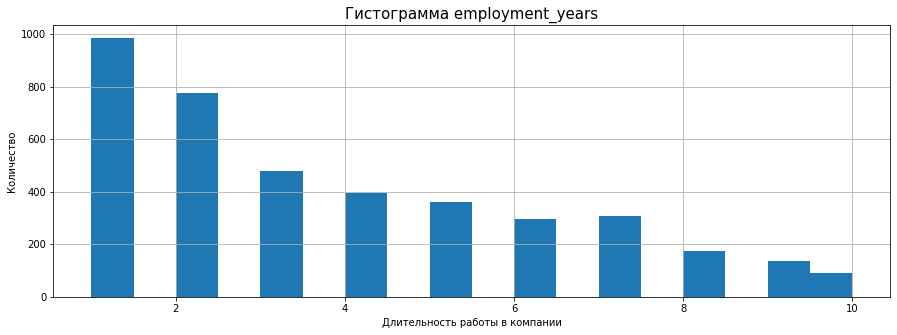

In [88]:
df_train_quit_without_id['employment_years'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма employment_years', size=15)
plt.xlabel('Длительность работы в компании')
plt.ylabel('Количество')
plt.show()

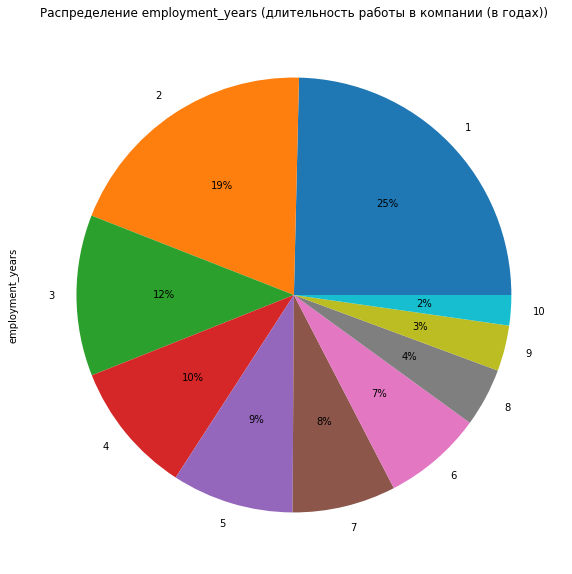

In [89]:
employment_years = df_train_quit_without_id.groupby('employment_years').employment_years.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение employment_years (длительность работы в компании (в годах))', autopct = '%1.0f%%');

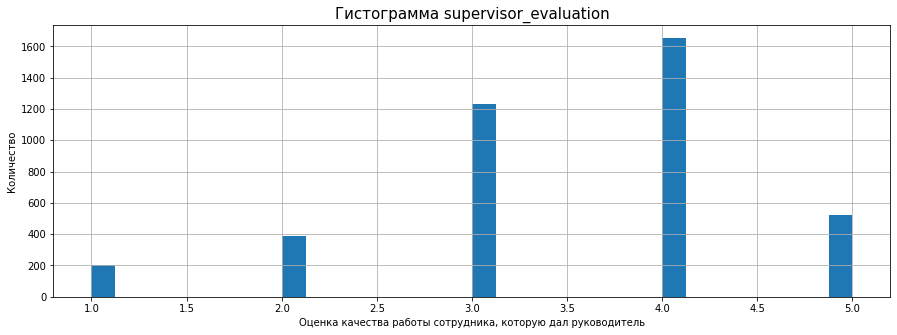

In [90]:
df_train_quit_without_id['supervisor_evaluation'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма supervisor_evaluation', size=15)
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель')
plt.ylabel('Количество')
plt.show()

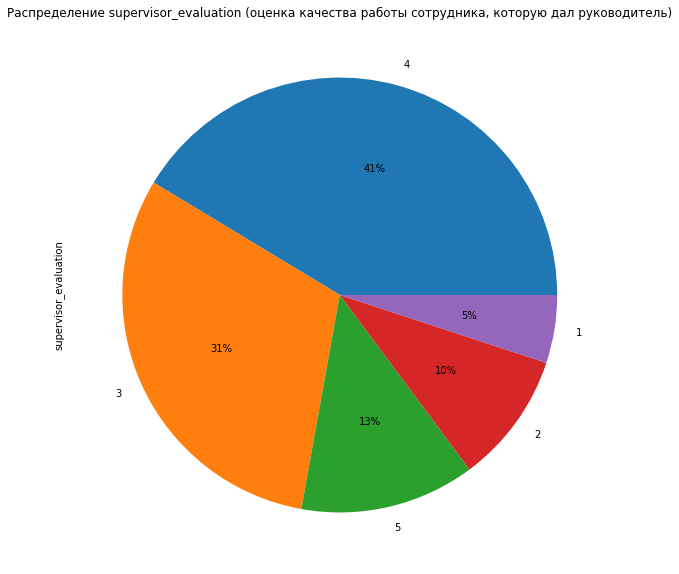

In [91]:
employment_years = df_train_quit_without_id.groupby('supervisor_evaluation').supervisor_evaluation.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение supervisor_evaluation (оценка качества работы сотрудника, которую дал руководитель)', autopct = '%1.0f%%');

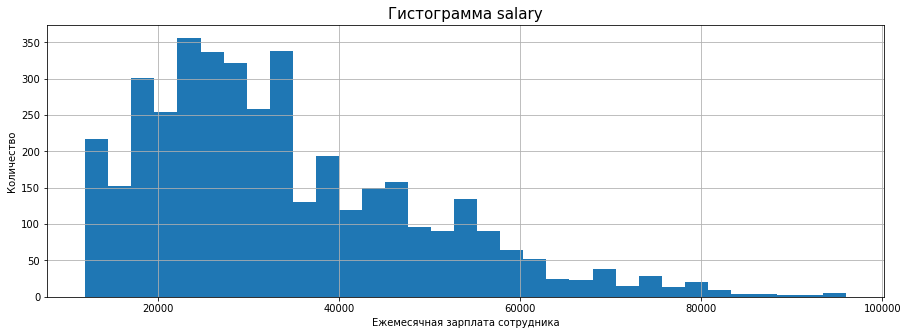

In [92]:
df_train_quit_without_id['salary'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма salary', size=15)
plt.xlabel('Ежемесячная зарплата сотрудника')
plt.ylabel('Количество')
plt.show()

In [93]:
dept = df_train_quit_without_id.groupby('dept').dept.count().sort_values(ascending=False)
quit = df_train_quit_without_id.groupby('quit').quit.count().sort_values(ascending=False) 
level = df_train_quit_without_id.groupby('level').dept.count().sort_values(ascending=False)
workload = df_train_quit_without_id.groupby('workload').workload.count().sort_values(ascending=False)
last_year_promo = df_train_quit_without_id.groupby('last_year_promo').last_year_promo.count().sort_values(ascending=False)
last_year_violations = df_train_quit_without_id.groupby('last_year_violations').last_year_violations.count().sort_values(ascending=False)

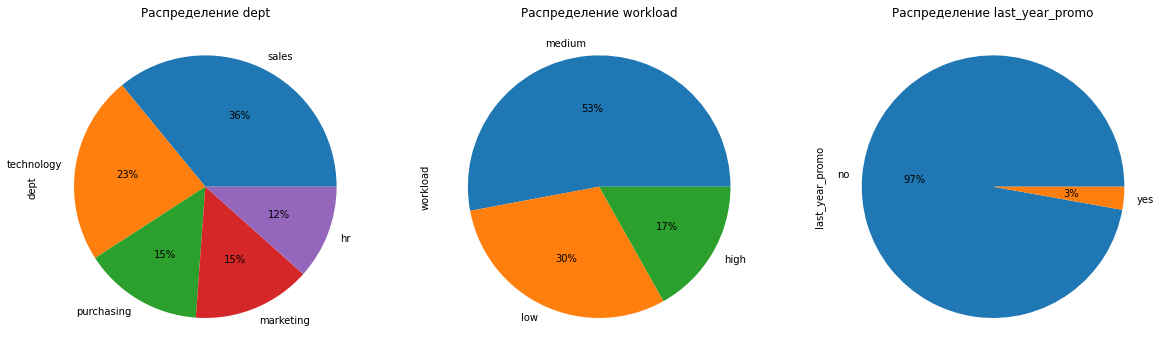

In [94]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
dept.plot(kind = 'pie', title = 'Распределение dept', autopct = '%1.0f%%')
plt.subplot(1, 3, 2)
workload.plot(kind = 'pie', title = 'Распределение workload', autopct = '%1.0f%%')
plt.subplot(1, 3, 3)
last_year_promo.plot(kind = 'pie', title = 'Распределение last_year_promo', autopct = '%1.0f%%');

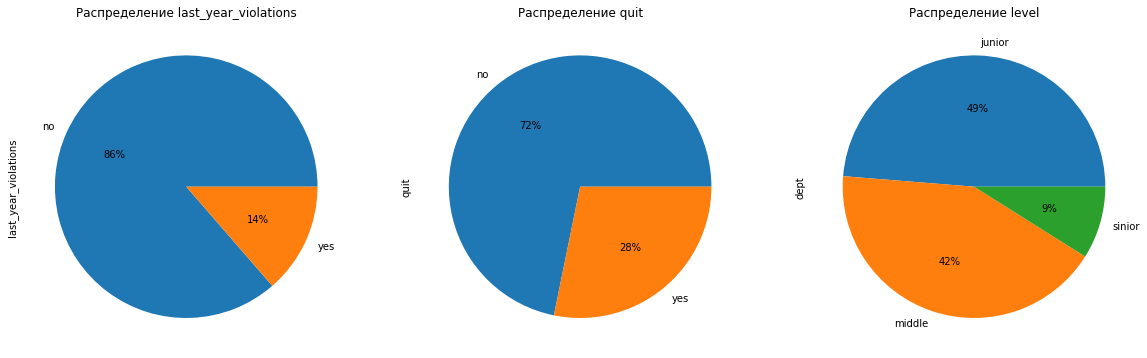

In [95]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
last_year_violations.plot(kind = 'pie', title = 'Распределение last_year_violations', autopct = '%1.0f%%')
plt.subplot(1, 3, 2)
quit.plot(kind = 'pie', title = 'Распределение quit', autopct = '%1.0f%%')
plt.subplot(1, 3, 3)
level.plot(kind = 'pie', title = 'Распределение level', autopct = '%1.0f%%');

Выводы:

* Длительность работы в компании: больше всего работает сотрудников до 2 лет
* Средняя оценка качества сотрудников 3-4 
* Средняя зарплата от 20 до 40тр 
* Больше всего работают в отделе sales и еусртщдщпн 36% и 23%, соответственно
* Загруженность 52% medium
* Повышение не имели 97% сотрудников 
* Нарушение имели 86% сотрудников за последний год
* Уволилось 28% сотрудников
* Джунов 49%, миддлов 42%

#### Гистограммы df_test_features

In [96]:
df_test_features_without_id = df_test_features.copy()
df_test_features_without_id = df_test_features_without_id.drop(['id'], axis=1)

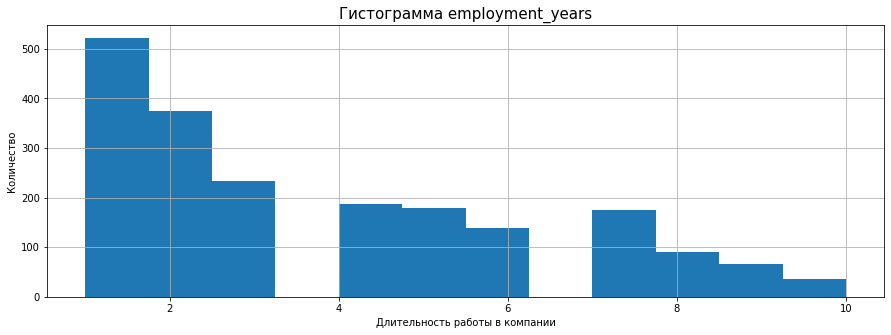

In [97]:
df_test_features_without_id['employment_years'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма employment_years', size=15)
plt.xlabel('Длительность работы в компании')
plt.ylabel('Количество')
plt.show()

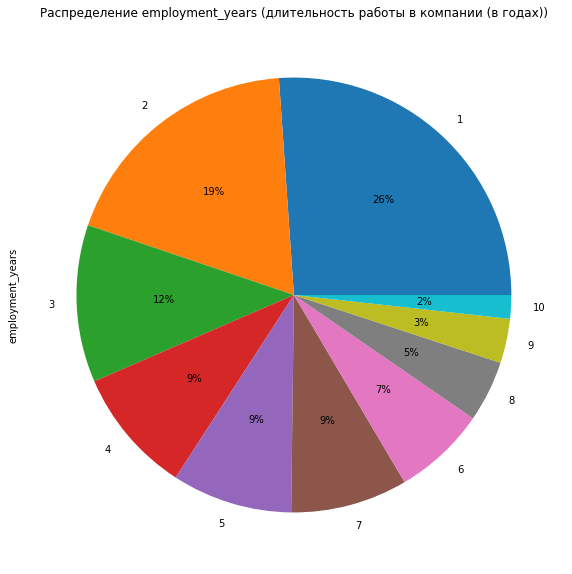

In [98]:
employment_years = df_test_features_without_id.groupby('employment_years').employment_years.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение employment_years (длительность работы в компании (в годах))', autopct = '%1.0f%%');

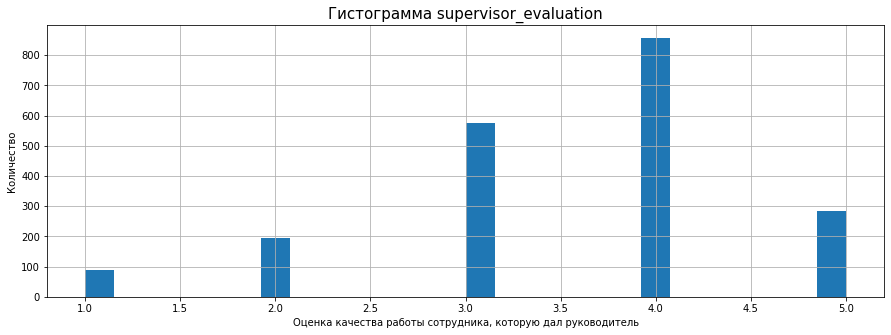

In [99]:
df_test_features_without_id['supervisor_evaluation'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма supervisor_evaluation', size=15)
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель')
plt.ylabel('Количество')
plt.show()

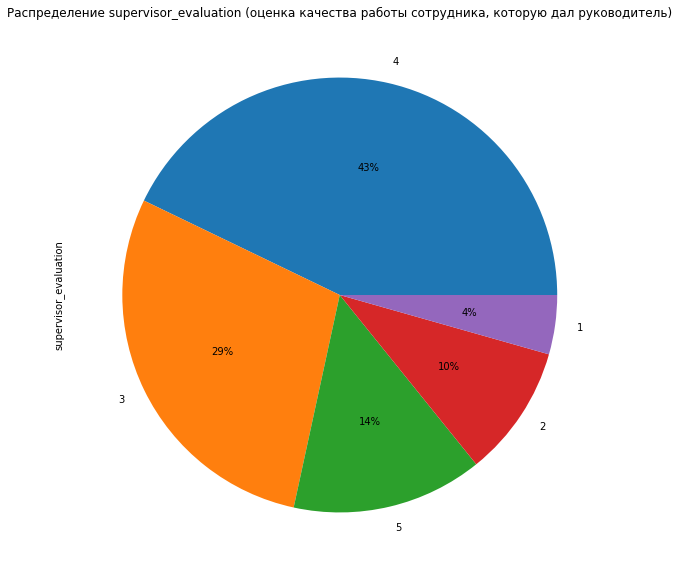

In [100]:
employment_years = df_test_features_without_id.groupby('supervisor_evaluation').supervisor_evaluation.count().sort_values(ascending=False)
employment_years.plot(kind = 'pie', title = 'Распределение supervisor_evaluation (оценка качества работы сотрудника, которую дал руководитель)', autopct = '%1.0f%%');

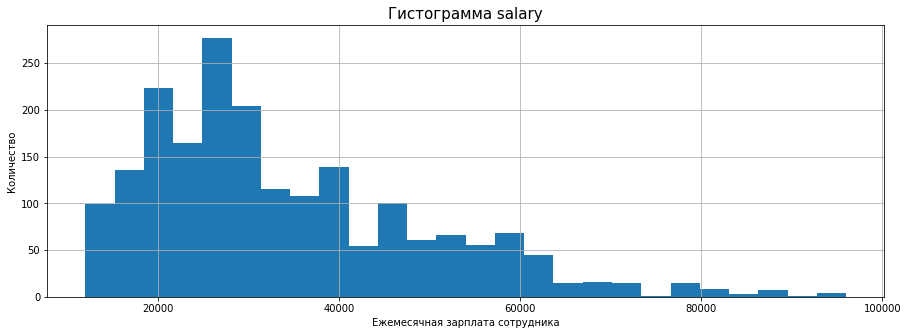

In [101]:
df_test_features_without_id['salary'].hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма salary', size=15)
plt.xlabel('Ежемесячная зарплата сотрудника')
plt.ylabel('Количество')
plt.show()

In [102]:
dept = df_test_features_without_id.groupby('dept').dept.count().sort_values(ascending=False)
workload = df_test_features_without_id.groupby('workload').workload.count().sort_values(ascending=False)
level = df_test_features_without_id.groupby('level').workload.count().sort_values(ascending=False)
last_year_promo = df_test_features_without_id.groupby('last_year_promo').last_year_promo.count().sort_values(ascending=False)
last_year_violations = df_test_features_without_id.groupby('last_year_violations').last_year_violations.count().sort_values(ascending=False)

<AxesSubplot:title={'center':'Распределение level'}, ylabel='workload'>

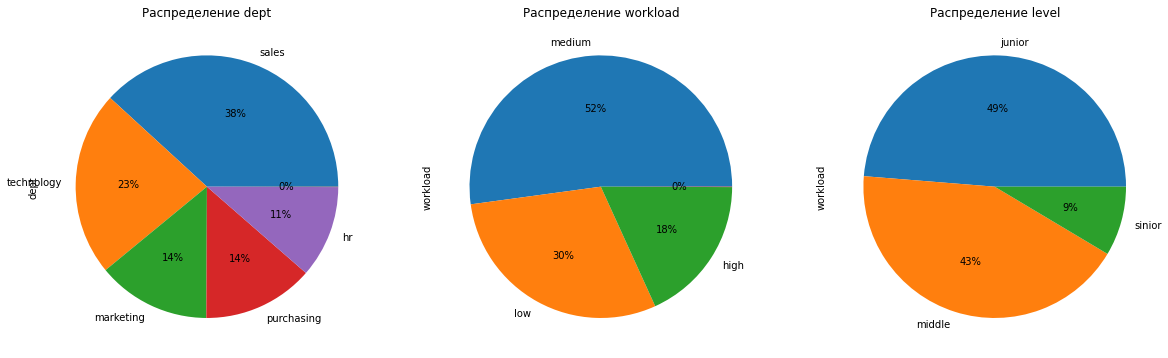

In [103]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
dept.plot(kind = 'pie', title = 'Распределение dept', autopct = '%1.0f%%')
plt.subplot(1, 3, 2)
workload.plot(kind = 'pie', title = 'Распределение workload', autopct = '%1.0f%%')
plt.subplot(1, 3, 3)
level.plot(kind = 'pie', title = 'Распределение level', autopct = '%1.0f%%')

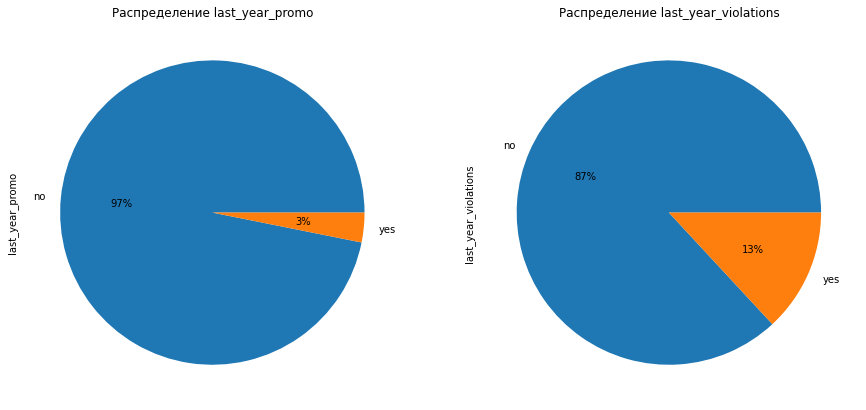

In [104]:
plt.subplot(1, 2, 1)
last_year_promo.plot(kind = 'pie', title = 'Распределение last_year_promo', autopct = '%1.0f%%')
plt.subplot(1, 2, 2)
last_year_violations.plot(kind = 'pie', title = 'Распределение last_year_violations', autopct = '%1.0f%%');

Выводы: практически идентично df_train_quit

#### Гистограммы df_test_target_quit

In [105]:
df_test_target_quit_without_id = df_test_target_quit.copy()
df_test_target_quit_without_id = df_test_target_quit_without_id.drop(['id'], axis=1)

In [106]:
quit = df_test_target_quit_without_id.groupby('quit').quit.count().sort_values(ascending=False)

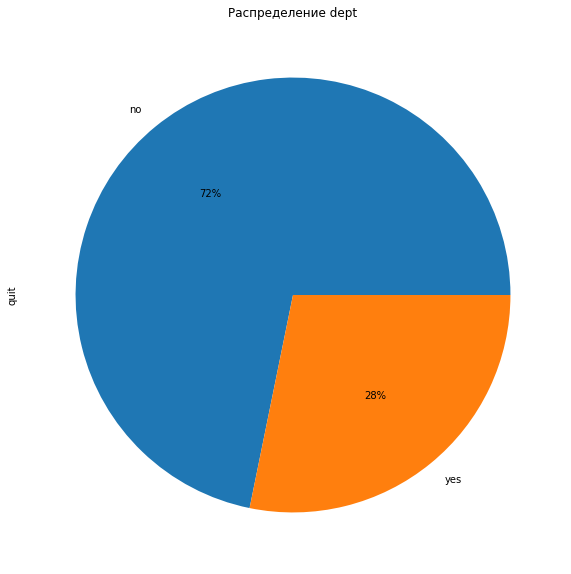

In [107]:
quit.plot(kind = 'pie', title = 'Распределение dept', autopct = '%1.0f%%');

Выводы: идентично df_train_quit

много людей уволилось, предлагаю рассмотреть подробнее

### Составим портрет «уволившегося сотрудника»

In [108]:
df_train_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no


In [109]:
data_quit = df_train_quit.query('quit == "yes"')
data_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes


In [110]:
segment = data_quit.groupby('salary')['quit'].count()
segment.head(8)

salary
12000    97
13200    46
14400    51
15600    67
16800    23
18000    68
19200    63
20400    44
Name: quit, dtype: int64

In [111]:
segment = data_quit.groupby('supervisor_evaluation')['quit'].count()
segment

supervisor_evaluation
1     95
2    164
3    523
4    286
5     60
Name: quit, dtype: int64

In [112]:
segment = data_quit.groupby('last_year_violations')['quit'].count()
segment

last_year_violations
no     900
yes    228
Name: quit, dtype: int64

In [113]:
segment = data_quit.groupby('last_year_promo')['quit'].count()
segment

last_year_promo
no     1127
yes       1
Name: quit, dtype: int64

In [114]:
segment = data_quit.groupby('level')['quit'].count()
segment

level
junior    1003
middle     108
sinior      17
Name: quit, dtype: int64

In [115]:
segment = data_quit.groupby('dept')['quit'].count()
segment

dept
hr            116
marketing     163
purchasing    166
sales         407
technology    276
Name: quit, dtype: int64

In [116]:
segment = data_quit.groupby('workload')['quit'].count()
segment

workload
high      121
low       519
medium    488
Name: quit, dtype: int64

In [117]:
segment = data_quit.groupby('employment_years')['quit'].count()
segment

employment_years
1     599
2     290
3     163
4      27
5      23
6      10
7       7
8       3
9       3
10      3
Name: quit, dtype: int64

Основные тезисы: \
    *большинство уволившихся сотрудников работали не более двух лет и имели низкую зарплату. \
    *больше всего сотрудников уволнялос в отделе sales и technology, с низкой или средней загруженностью. \
    *Оценка качества работы сотрудника больше всего 3. \
    *228 против 900 нарушали трудоую дисциплину \
    *Практически всех не повышали за последний год \
    *Должность junior

### Корреляционный анализ

предлагаю его провести после прогноза job_satisfaction_rate, чтобы было наглядно видна корреляционная связь.

### пункт 3.3 уровень удовлетворённости сотрудника работой в компании

проделаем позже, после прогноза по job_satisfaction_rate

## Шаг 4. Добавление нового входного признака

In [118]:
df_train_quit['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(df_train_quit)

In [119]:
df_train_quit #проверяем

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,63.812436
1,814010,sales,junior,medium,2,no,no,4,27600,no,84.765669
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,40.259024
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,33.186317
4,910140,marketing,junior,medium,2,no,no,5,25200,no,80.463283
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,51.703766
3996,672059,sales,middle,high,9,no,no,4,52800,no,83.737286
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,55.100285
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,51.419858


посмотрим корреляцию

In [120]:
df_train_quit.iloc[:,1:].phik_matrix(interval_cols = ['salary',
                                                 'job_satisfaction_rate']
                               )

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.269547,0.000000,0.152745
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.735187,0.312799,0.205949
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.790246,0.132243,0.155922
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.477566,0.659093,0.428274
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.213816,0.157370,0.585166
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.067084,0.185071,0.636516
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.050193,0.245489,0.788269
salary,0.269547,0.735187,0.790246,0.477566,0.213816,0.067084,0.050193,1.000000,0.508234,0.206829
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.508234,1.000000,0.521187
job_satisfaction_rate,0.152745,0.205949,0.155922,0.428274,0.585166,0.636516,0.788269,0.206829,0.521187,1.000000


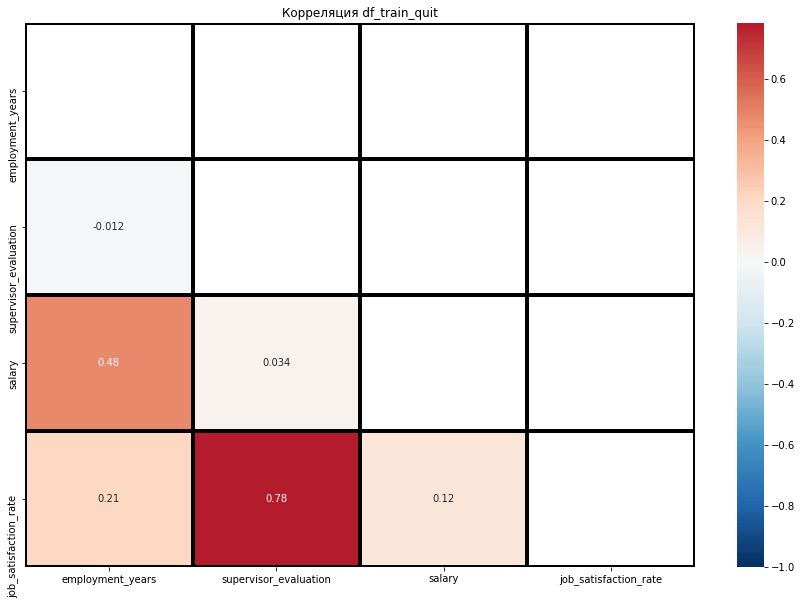

In [121]:
mask = np.triu(df_train_quit.iloc[:,1:].corr())
ax = sns.heatmap(df_train_quit.iloc[:,1:].corr(method='spearman'), cmap=sns.color_palette("RdBu_r", 1000), 
                 vmin=-1, center=0, annot=True, linewidths=3, 
                 linecolor='black', mask=mask) 
sns.set(rc={"figure.figsize": (10, 10)}) 
plt.title("Корреляция df_train_quit");

job_satisfaction_rate и quit имеют среднюю коррялиционную связь

In [122]:
df_test_features_quit = df_test_features.merge(df_test_target_quit, left_on='id', right_on='id', how='left')
df_test_features_quit['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(df_test_features_quit)
df_test_features_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,no,86.314299
1,686555,hr,junior,medium,1,no,no,4,30000,no,67.699940
2,467458,sales,middle,low,5,no,no,4,19200,no,65.862334


#### Уволившийся сотрудник

In [123]:
df_y['id'].sort_values().unique()

array([100298, 100480, 100503, ..., 998762, 998900, 999029])

In [124]:
df_test_target_quit['id'].sort_values().unique()

array([100298, 100480, 100503, ..., 998762, 998900, 999029])

In [125]:
df_satisfaction = df_y.merge(df_test_target_quit, left_on='id', right_on='id', how='left')

In [126]:
df_satisfaction

,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no
2,418490,0.60,yes
3,555320,0.72,no
4,826430,0.08,yes
...,...,...,...
1995,405257,0.28,no
1996,370925,0.21,yes
1997,857722,0.39,no
1998,303402,0.26,yes


In [127]:
display('Дубликаты df_satisfaction:',df_satisfaction.duplicated().sum())

'Дубликаты df_satisfaction:'

0

In [128]:
segment = df_satisfaction.groupby('quit')['job_satisfaction_rate'].count()
segment.tail()

quit
no     1436
yes     564
Name: job_satisfaction_rate, dtype: int64

уволилось больше четверти сотрудников

In [129]:
data_quit_1 = df_satisfaction.query('quit == "yes"')
segment_1 = data_quit_1.groupby('job_satisfaction_rate')['quit'].count()

data_quit_0 = df_satisfaction.query('quit == "no"')
segment_0 = data_quit_0.groupby('job_satisfaction_rate')['quit'].count()

In [130]:
display('средний уровень удовлетворенности уволившегося сотрудника:', data_quit_1['job_satisfaction_rate'].mean())

'средний уровень удовлетворенности уволившегося сотрудника:'

0.38771276595744686

In [131]:
display('средний уровень удовлетворенности не уволившегося сотрудника:', data_quit_0['job_satisfaction_rate'].mean())

'средний уровень удовлетворенности не уволившегося сотрудника:'

0.6120403899721449

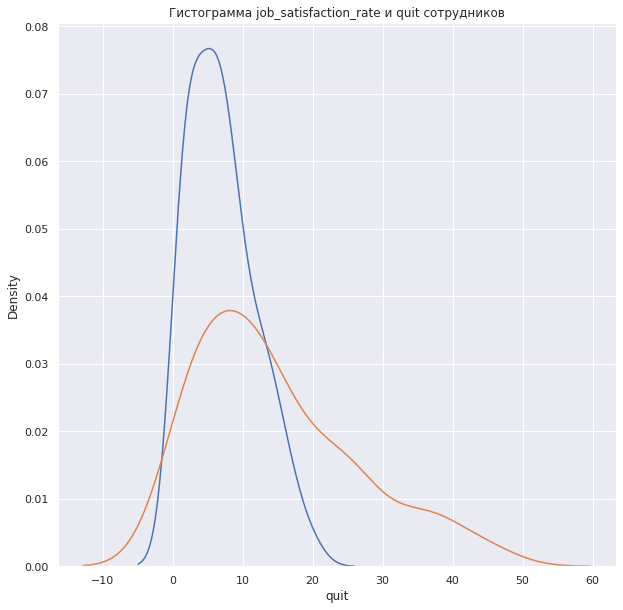

In [132]:
sns.kdeplot(data=segment_1)
sns.kdeplot(data=segment_0)
plt.title("Гистограмма job_satisfaction_rate и quit сотрудников");

Уровень удовлетворённости влияет на решение уволиться, в среднем уволившиеся сотрудники имеют 38.74, а те кто работают 61.16

## Шаг 5. Подготовка данных

In [133]:
ohe_columns = [
    'last_year_violations',
    'last_year_promo',
    'dept'
]
ord_columns = [
    'level',
    'workload'
]
num_columns = ['salary', 'job_satisfaction_rate', 'employment_years', 'supervisor_evaluation'] 

## Шаг 6. Обучение модели

In [134]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',  
            OneHotEncoder(drop='first', sparse_output=False, handle_unknown = 'ignore'
                )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ])


In [135]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'simpleImputer_before_ord2', 
            SimpleImputer(missing_values=" ", strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['medium', 'high', 'low'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ])

In [136]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
    ], 
    remainder='passthrough'
) 

In [137]:
pipe_final_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

In [138]:
le = LabelEncoder()

In [139]:
le.fit(df_train_quit['quit']);

In [140]:
df_train_quit['quit'] = le.transform(df_train_quit['quit'])
df_train_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,0,63.812436
1,814010,sales,junior,medium,2,no,no,4,27600,0,84.765669
2,155091,purchasing,middle,medium,5,no,no,1,37200,0,40.259024


In [141]:
df_train_quit['quit'].unique()

array([0, 1])

In [142]:
param_distributions = [
    # словарь для модели KNeighborsClassifier() 
    {
        # название модели
        'models': [KNeighborsClassifier()],
        # указываем гиперпараметр модели n_neighbors
        'models__n_neighbors': range(1, 20),
        # указываем список методов масштабирования
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC() # очень долго думает
#    {
#        'models': [SVC(random_state=RANDOM_STATE)],
#        'models__C': [0.1,1,100,1000],
#        'models__kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
#        'models__gamma': [1, 0.1, 0.01, 0.0001],
#        'models__degree': range(1,7),
#        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
#
#    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели DummyRegressor()
    {
        'models': [DummyRegressor()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']             
    }
] 

In [143]:
randomized_search_2 = RandomizedSearchCV(
    pipe_final_final, 
    param_distributions=param_distributions,  
    random_state=RANDOM_STATE, 
    n_jobs=-1,
    cv=5,
    scoring='roc_auc'
)

In [144]:
df_train_quit_id = df_train_quit.drop(['id'], axis=1)

In [145]:
display('Дубликаты df_train_quit:', df_train_quit_id.duplicated().sum())

'Дубликаты df_train_quit:'

1413

In [146]:
df_train_quit_id = df_train_quit_id.drop_duplicates()

In [147]:
df_train_quit_id.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,sales,middle,high,2,no,no,4,54000,0,63.812436
1,sales,junior,medium,2,no,no,4,27600,0,84.765669
2,purchasing,middle,medium,5,no,no,1,37200,0,40.259024


In [148]:
display('Дубликаты df_train_quit:', df_train_quit_id.duplicated().sum())

'Дубликаты df_train_quit:'

0

In [149]:
# проверим на тренировочной выборке
randomized_search_2.fit(df_train_quit_id.drop(['quit'], axis=1), df_train_quit_id['quit']);

In [150]:
print('\nЛучшая модель и её параметры:\n\n', randomized_search_2.best_estimator_) 
print('Метрика roc_auc для лучшей модели:\n', randomized_search_2.best_score_)


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                             

In [151]:
result = pd.DataFrame(randomized_search_2.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(3)) 

   rank_test_score                             param_models  mean_test_score  \
5                1                   KNeighborsClassifier()         0.901304   
0                2                   KNeighborsClassifier()         0.901268   
8                3  DecisionTreeClassifier(random_state=42)         0.899703   

                                              params  
5  {'preprocessor__num': StandardScaler(), 'model...  
0  {'preprocessor__num': StandardScaler(), 'model...  
8  {'preprocessor__num': 'passthrough', 'models__...  


In [152]:
df_test_target_quit['quit'] = le.transform(df_test_target_quit['quit'])
df_test_target_quit.head(3)

,id,quit
0,999029,1
1,372846,0
2,726767,0


In [153]:
df_train_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,0,63.812436
1,814010,sales,junior,medium,2,no,no,4,27600,0,84.765669
2,155091,purchasing,middle,medium,5,no,no,1,37200,0,40.259024


проверим на тестовой выборке

In [154]:
df_test_target_quit_1 = df_test_target_quit.drop(['id'], axis=1)

In [155]:
df_test_features['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(df_test_features)

In [156]:
y_pred_2 = randomized_search_2.best_estimator_.predict_proba(df_test_features)

In [157]:
roc_auc = roc_auc_score(df_test_target_quit_1, y_pred_2[:,1:])
print('ROC-AUC = ', roc_auc.round(2))

ROC-AUC =  0.48


In [158]:
y_pred_2 = randomized_search_2.best_estimator_.predict(df_test_features)

In [159]:
report = classification_report(df_test_target_quit_1, y_pred_2)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1436
           1       0.26      0.22      0.24       564

    accuracy                           0.60      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.58      0.60      0.59      2000



In [160]:
confusion_matrix(df_test_target_quit_1, y_pred_2)

array([[1081,  355],
       [ 438,  126]])

очень много значений FP и FN

In [161]:
X_train = df_train_quit.copy()
X_test = df_test_features.copy()
y_test = df_test_target_quit.copy()

In [162]:
data_test_final = X_test.merge(y_test, left_on='id', right_on='id', how='left')
data_test_final.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,86.314299,0
1,686555,hr,junior,medium,1,no,no,4,30000,67.699940,0
2,467458,sales,middle,low,5,no,no,4,19200,65.862334,0


In [163]:
X_train = X_train.drop(['id'], axis=1)
X_test = X_test.drop(['id'], axis=1)

In [164]:
X = data_test_final.drop(['quit', 'id'], axis=1)
y = data_test_final['quit']

In [165]:
y_pred_4 = randomized_search_2.best_estimator_.predict_proba(X)

In [166]:
roc_auc = roc_auc_score(y, y_pred_4[:,1:])
print('ROC-AUC = ', roc_auc.round(3))

ROC-AUC =  0.912


In [167]:
y_pred_5 = randomized_search_2.best_estimator_.predict(X)
#y_pred_5 = le.transform(y_pred_5)

In [168]:
report = classification_report(y, y_pred_5)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1436
           1       0.86      0.74      0.80       564

    accuracy                           0.89      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.89      0.89      0.89      2000



precision (доля объектов, названных классификатором положительными и при этом действительно являющимися положительными) - 0: 90%, 1: 86% \
recall (отношение верно классифицированных объектов класса к общему числу элементов этого класса)  - 0: 95%,   1: 74% \
f1 (среднее гармоническое значение точности и полноты) - 0: 93%, 1: 80%

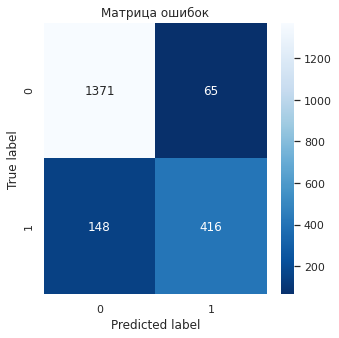

In [169]:
cm = confusion_matrix(y, y_pred_5)
plt.figure(figsize = (5,5))
plt.title("Матрица ошибок")
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.xlabel('Predicted label')
plt.ylabel('True label');

истинно положительный (TP) - 1370 \
истинно отрицательный (TN) - 417 \
ложноположительный результат (FP), ошибка I рода - 66 \
ложноотрицательный результат (FN), ошибка II рода 147 

## Шаг 7. Выводы

Лучше всего справилась метрика KNeighborsClassifier(n_neighbors=12), по метрике ROC_AUC на тренировочной имеем 92.4%, на тестовой 91.5%

# Общий вывод

Задача 1: предсказание уровня удовлетворённости сотрудника
После получения входных данных, была проведена предобработка данных:
* проверили пропуски;
* проверили дубликаты;
* уникальные значения;
* выбросы. Построили гистограммы выбросов.
Никаких отклонений от нормы замечено не было.

Провели исследовательский анализ данных:
* построили диаграммы;
* проверили корреляцию.



Подготовили данные и создали конвеер, по нему обучили модель. Вычислили, что лучше всего справляется модель DecisionTreeClassifier со следующими гипперпараметрами:max_depth=5, min_samples_leaf=2, min_samples_split=5.

Проверил работу модели метрикой SMAPE, которую сами инициализировали.

Задача 2: предсказание увольнения сотрудника из компании
После ознакомления с входными данных, была проведена предобработка данных:
* проверили пропуски;
* проверили дубликаты;
* уникальные значения;
* выбросы. Построили гистограммы выбросов.
Никаких отклонений от нормы замечено не было.

Применили первую модель для прогнозирования удовлетворенности уровня сотрудников и добавили новый столбец job_satisfaction_rate

Провели исследовательский анализ данных:
* построили диаграммы;
* проверили корреляцию.

Построили гистограммы по уровню удовлетворённости сотрудников уволившихся и еще нет.

Подготовили данные и создали конвеер, по нему обучили модель. Вычислили, что лучше всего справляется модель KNeighborsClassifier со следующими гипперпараметрами:n_neighbors=12.

Проверили разные метрики: ROC_AUC, F1, recall, precision. Посмотрели на ошибки confusion_matrix.

Несколько замечаний по ходу проекта:
* уровень удовлетворённости сотрудника работой имеет низкую корреляцию с зарплатой, но высокую с оценкой руководителя и с повышением за последний год;
* больше всего сотрудников уволнялос в отделе sales и technology, с низкой или средней загруженностью;
* большинство уволившихся сотрудников работали не более двух лет и имели низкую зарплату;
* job_satisfaction_rate и quit имеют среднюю коррялиционную связь.

У quit корреляционая зависимость с employment_years, salary и job_satisfaction_rate.

Я бы предложил поработать именно над этими параметрами.